In [258]:
# loading library 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
from scipy.stats import skew

from scipy import stats
from scipy.stats import zscore
import statistics
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,plot_confusion_matrix
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")


from termcolor import colored

import plotly.io as pio
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder

from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
pio.templates.default = "none"

from matplotlib import animation

from matplotlib.animation import FuncAnimation

%matplotlib qt
%matplotlib inline


In [259]:
df=pd.read_csv('Cars.csv')

In [260]:
df.head()

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,Male,0,0,4,14.3,3.2,0,Public Transport
1,23,Female,1,0,4,8.3,3.3,0,Public Transport
2,29,Male,1,0,7,13.4,4.1,0,Public Transport
3,28,Female,1,1,5,13.4,4.5,0,Public Transport
4,27,Male,1,0,4,13.4,4.6,0,Public Transport


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        444 non-null    int64  
 1   Gender     444 non-null    object 
 2   Engineer   444 non-null    int64  
 3   MBA        444 non-null    int64  
 4   Work Exp   444 non-null    int64  
 5   Salary     444 non-null    float64
 6   Distance   444 non-null    float64
 7   license    444 non-null    int64  
 8   Transport  444 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 31.3+ KB


In [262]:
lst=list(df.columns)
lst

['Age',
 'Gender',
 'Engineer',
 'MBA',
 'Work Exp',
 'Salary',
 'Distance',
 'license',
 'Transport']

In [263]:
for i in lst:
    print("Unique value of", i)
    print(df[i].unique())
    print('***************************************************')

Unique value of Age
[28 23 29 27 26 22 25 24 32 34 30 20 33 21 31 19 39 36 35 38 40 18 37 42
 43]
***************************************************
Unique value of Gender
['Male' 'Female']
***************************************************
Unique value of Engineer
[0 1]
***************************************************
Unique value of MBA
[0 1]
***************************************************
Unique value of Work Exp
[ 4  7  5  3  1  2  9 13  6  8  0 11 10 19 16 12 21 17 14 18 15 20 22 24]
***************************************************
Unique value of Salary
[14.3  8.3 13.4 12.3 14.4 10.5  7.5 13.5 11.5  8.5 15.5 16.5  8.6 11.4
 10.6 14.6  9.5 13.6  7.6 16.6 12.5 12.6  9.6  8.4 36.6 11.7  6.5 15.6
 21.7  7.7 13.7 15.4  8.7 12.4 21.6 14.7 13.8  8.8 11.6  9.8 15.7 14.8
 12.7 12.8 17.8 10.8 22.8 19.7 10.9 20.7 38.9  7.9 11.9 16.9 25.9  6.6
 34.8 28.8  6.8  9.9 12.9 23.8 13.9 15.9 14.5 14.9  9.7 16.8 39.9 39.
 28.7 36.9 15.8  7.8 10.7 34.9 16.7  8.  47.  22.7 20.9 17.   6.9 11

In [264]:

df.isnull().sum()

Age          0
Gender       0
Engineer     0
MBA          0
Work Exp     0
Salary       0
Distance     0
license      0
Transport    0
dtype: int64

In [265]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,444.0,27.747748,4.416710,18.0,25.0,27.0,30.000,43.0
Engineer,444.0,0.754505,0.430866,0.0,1.0,1.0,1.000,1.0
MBA,444.0,0.252252,0.434795,0.0,0.0,0.0,1.000,1.0
Work Exp,444.0,6.299550,5.112098,0.0,3.0,5.0,8.000,24.0
Salary,444.0,16.238739,10.453851,6.5,9.8,13.6,15.725,57.0
Distance,444.0,11.323198,3.606149,3.2,8.8,11.0,13.425,23.4
license,444.0,0.234234,0.423997,0.0,0.0,0.0,0.000,1.0


In [266]:
df.corr()

,Age,Engineer,MBA,Work Exp,Salary,Distance,license
Age,1.000000,0.091935,-0.029090,0.932236,0.860673,0.352872,0.452311
Engineer,0.091935,1.000000,0.066218,0.085729,0.086762,0.059316,0.018924
MBA,-0.029090,0.066218,1.000000,0.008582,-0.007270,0.036427,-0.027358
Work Exp,0.932236,0.085729,0.008582,1.000000,0.931974,0.372735,0.452867
Salary,0.860673,0.086762,-0.007270,0.931974,1.000000,0.442359,0.508095
Distance,0.352872,0.059316,0.036427,0.372735,0.442359,1.000000,0.290084
license,0.452311,0.018924,-0.027358,0.452867,0.508095,0.290084,1.000000


In [267]:
#EDA

In [268]:
df_object = []
df_num = []

for i in df.columns.values:
    if df[i].dtype == 'object':
        df_object.append(i)
    else:
        df_num.append(i)
    
display(df_object)
display(df_num)

['Gender', 'Transport']

['Age', 'Engineer', 'MBA', 'Work Exp', 'Salary', 'Distance', 'license']

<AxesSubplot:xlabel='Age', ylabel='count'>

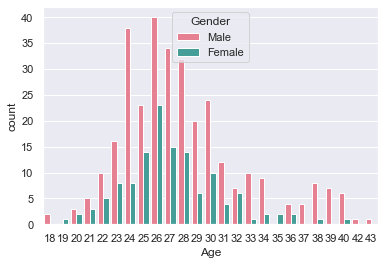

In [308]:
sns.countplot(x="Age", hue="Gender", data=df, palette="husl")

<AxesSubplot:xlabel='Distance', ylabel='count'>

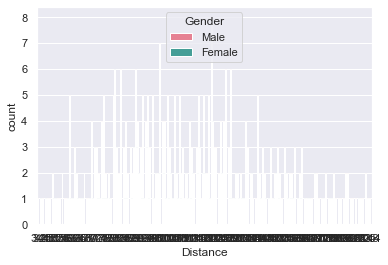

In [309]:
sns.countplot(x="Distance", hue="Gender", data=df, palette="husl")

<AxesSubplot:xlabel='Work Exp', ylabel='count'>

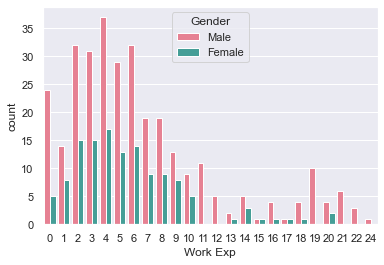

In [310]:
sns.countplot(x="Work Exp", hue="Gender", data=df, palette="husl")

<AxesSubplot:xlabel='license', ylabel='count'>

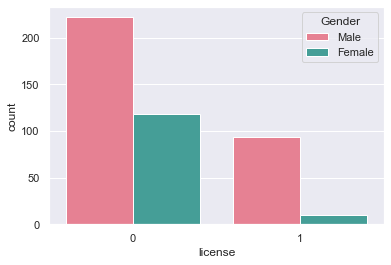

In [311]:
sns.countplot(x="license", hue="Gender", data=df, palette="husl")

<AxesSubplot:xlabel='Transport', ylabel='count'>

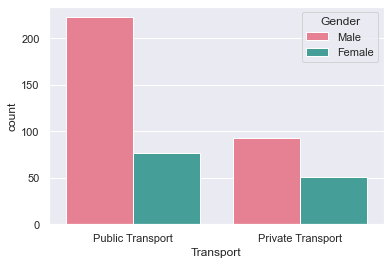

In [312]:
sns.countplot(x="Transport", hue="Gender", data=df, palette="husl")

<AxesSubplot:xlabel='Engineer', ylabel='count'>

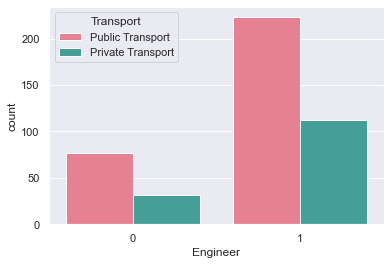

In [298]:


sns.countplot(x="Engineer", hue="Transport", data=df, palette="husl")

<AxesSubplot:xlabel='Transport', ylabel='count'>

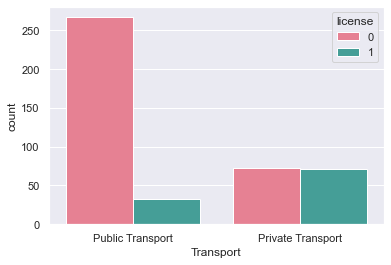

In [278]:
sns.countplot(x="Transport", hue="license", data=df, palette="husl")

<AxesSubplot:xlabel='Transport', ylabel='count'>

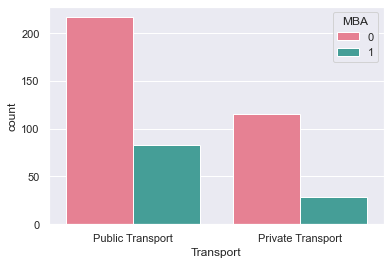

In [277]:
sns.countplot(x="Transport", hue="MBA", data=df, palette="husl")

<AxesSubplot:xlabel='license', ylabel='count'>

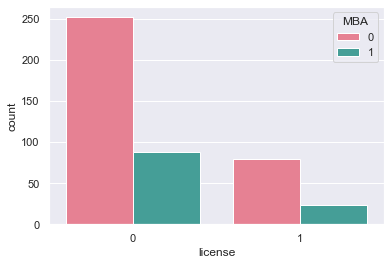

In [313]:
sns.countplot(x="license", hue="MBA", data=df, palette="husl")

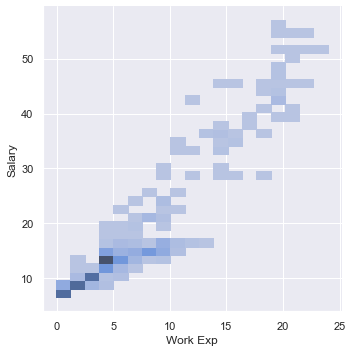

In [297]:
sns.displot(data=df, x='Work Exp',y='Salary')


In [288]:
lst1=df['Salary']
lst2=df['Transport']



fig = px.bar(
            df,
            x=lst2,
            y=lst1,
            color=lst2,
            animation_frame=df['Age'],
            animation_group=lst2,
            range_y=[0,11]
            )
fig.show()

In [303]:
#boxplot
fig=px.box(x=df['Distance'],y=df['Transport'])


fig.show()


In [304]:
fig=px.box(x=df['Salary'],y=df['Transport'])


fig.show()

In [305]:
fig=px.box(x=df['license'],y=df['Transport'])
fig.show()

In [306]:
ig=px.box(x=df['Work Exp'],y=df['Transport'])
fig.show()

In [307]:
fig=px.box(x=df['Age'],y=df['Gender'])
fig.show()

(array([11., 41., 86., 93., 96., 53., 38., 16.,  5.,  5.]),
 array([ 3.2 ,  5.22,  7.24,  9.26, 11.28, 13.3 , 15.32, 17.34, 19.36,
        21.38, 23.4 ]),
 <BarContainer object of 10 artists>)

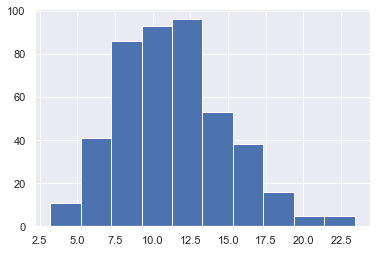

In [282]:
plt.hist(df['Distance'])


(array([153., 192.,  30.,  12.,   7.,  11.,  11.,  15.,   8.,   5.]),
 array([ 6.5 , 11.55, 16.6 , 21.65, 26.7 , 31.75, 36.8 , 41.85, 46.9 ,
        51.95, 57.  ]),
 <BarContainer object of 10 artists>)

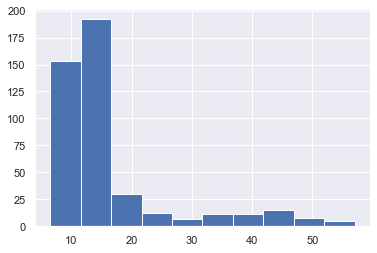

In [283]:
plt.hist(df['Salary'])

(array([  8.,  23., 107., 112., 106.,  29.,  24.,  10.,  23.,   2.]),
 array([18. , 20.5, 23. , 25.5, 28. , 30.5, 33. , 35.5, 38. , 40.5, 43. ]),
 <BarContainer object of 10 artists>)

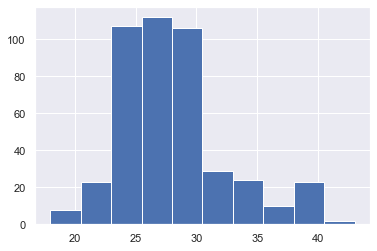

In [281]:
plt.hist(df['Age'])

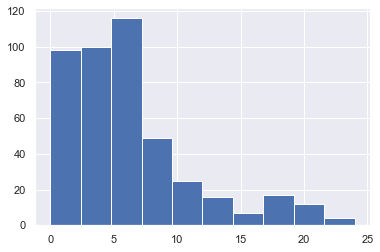

In [319]:
#Salary
plt.hist(df['Work Exp'])

plt.show()

<AxesSubplot:>

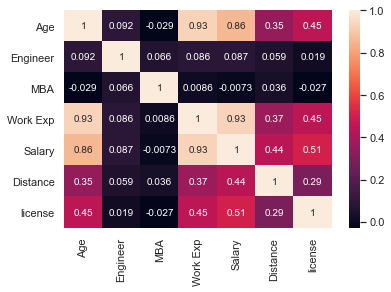

In [16]:
corr=df.corr()

sns.heatmap(corr,ax=plt.subplot(),annot=True)

In [17]:
gen=[]
for x in df['Gender']:
    if x=="Male":
        gen.append(1)
    else:
        gen.append(0)
df['Gender']=gen
df.head(15)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,Public Transport
1,23,0,1,0,4,8.3,3.3,0,Public Transport
2,29,1,1,0,7,13.4,4.1,0,Public Transport
3,28,0,1,1,5,13.4,4.5,0,Public Transport
4,27,1,1,0,4,13.4,4.6,0,Public Transport
5,26,1,1,0,4,12.3,4.8,1,Public Transport
6,28,1,1,0,5,14.4,5.1,0,Private Transport
7,26,0,1,0,3,10.5,5.1,0,Public Transport
8,22,1,1,0,1,7.5,5.1,0,Public Transport
9,27,1,1,0,4,13.5,5.2,0,Public Transport


In [18]:
trans=[]
for y in df["Transport"]:
    if y=="Public Transport":
        trans.append(1)
    else:
        trans.append(0)
df["Transport"]=trans
df.head(15)

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license,Transport
0,28,1,0,0,4,14.3,3.2,0,1
1,23,0,1,0,4,8.3,3.3,0,1
2,29,1,1,0,7,13.4,4.1,0,1
3,28,0,1,1,5,13.4,4.5,0,1
4,27,1,1,0,4,13.4,4.6,0,1
5,26,1,1,0,4,12.3,4.8,1,1
6,28,1,1,0,5,14.4,5.1,0,0
7,26,0,1,0,3,10.5,5.1,0,1
8,22,1,1,0,1,7.5,5.1,0,1
9,27,1,1,0,4,13.5,5.2,0,1


In [19]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Transport'])
y=df['Transport']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [20]:
#LOGISTIC REGRESSION

In [21]:
Logistic_model=LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
Logistic_model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [22]:
y_train_predict=Logistic_model.predict(X_train)
Logistic_model_score=Logistic_model.score(X_train,y_train)
print(Logistic_model_score)
print('')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('')
print(metrics.classification_report(y_train,y_train_predict))

0.7870967741935484

[[ 58  44]
 [ 22 186]]

              precision    recall  f1-score   support

           0       0.72      0.57      0.64       102
           1       0.81      0.89      0.85       208

    accuracy                           0.79       310
   macro avg       0.77      0.73      0.74       310
weighted avg       0.78      0.79      0.78       310



In [23]:
print('accuracy of train dataset:',Logistic_model_score)

accuracy of train dataset: 0.7870967741935484


In [24]:
print('accuracy of train dataset:',Logistic_model_score)

accuracy of train dataset: 0.7870967741935484


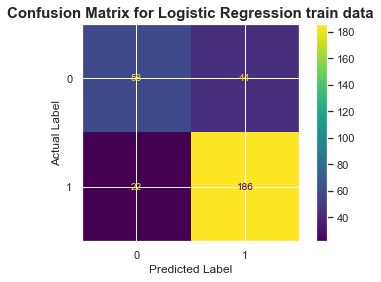

In [25]:
plot_confusion_matrix(Logistic_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic Regression train data',fontsize=15,fontweight='bold')
plt.show()

In [26]:
y_train_prob=Logistic_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.058536,0.941464
1,0.259928,0.740072
2,0.235071,0.764929
3,0.136701,0.863299
4,0.169100,0.830900


In [27]:
y_test_predict=Logistic_model.predict(X_test)
Logistic_model_score=Logistic_model.score(X_test,y_test)
print(Logistic_model_score)
print('')
print(metrics.confusion_matrix(y_test,y_test_predict))
print('')
print(metrics.classification_report(y_test,y_test_predict))

0.8059701492537313

[[25 17]
 [ 9 83]]

              precision    recall  f1-score   support

           0       0.74      0.60      0.66        42
           1       0.83      0.90      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.75      0.76       134
weighted avg       0.80      0.81      0.80       134



In [28]:
print('accuracy of test dataset:',Logistic_model_score)

accuracy of test dataset: 0.8059701492537313


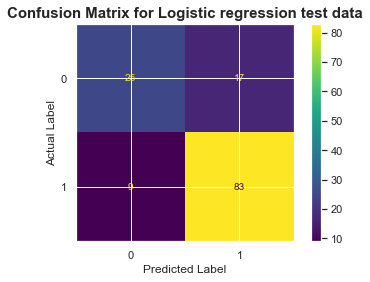

In [29]:
plot_confusion_matrix(Logistic_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic regression test data',fontsize=15,fontweight='bold')
plt.show()

In [30]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[25 17]
 [ 9 83]]


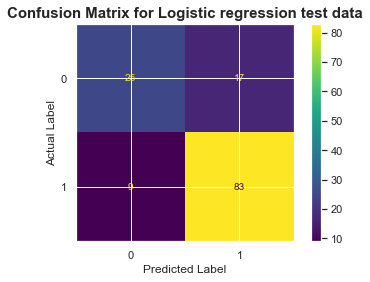

In [31]:
plot_confusion_matrix(Logistic_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Logistic regression test data',fontsize=15,fontweight='bold')
plt.show()

In [32]:
y_test_prob=Logistic_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.623812,0.376188
1,0.056026,0.943974
2,0.465471,0.534529
3,0.036025,0.963975
4,0.483742,0.516258


ROC_AUC score: 0.835


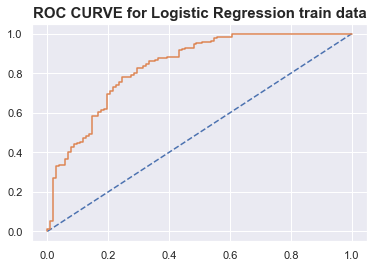

In [33]:
# predict probabilities
probs = Logistic_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Logistic Regression train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

ROC_AUC score: 0.816


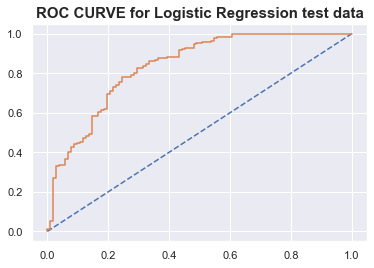

In [34]:
probs_test = Logistic_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('ROC_AUC score: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC CURVE for Logistic Regression test data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

Feature: 0, Score: 0.29207
Feature: 1, Score: 1.31650
Feature: 2, Score: -0.35872
Feature: 3, Score: 0.39757
Feature: 4, Score: -0.18485
Feature: 5, Score: -0.05880
Feature: 6, Score: -0.23092
Feature: 7, Score: -2.27380


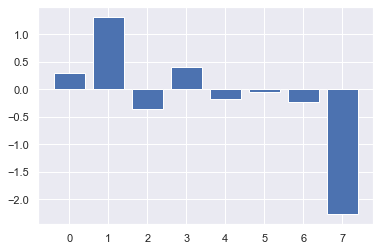

In [35]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# get importance
importance = Logistic_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [36]:
# View the Intercept and Coefficents:::

print(Logistic_model.coef_ )#Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(Logistic_model.intercept_)  #Prints value for intercept/b0 
print(pd.DataFrame(zip(X_train.columns, np.transpose(Logistic_model.coef_.tolist()[0])), columns=['features', 'coef']))

# Due to the logit function, logistic regression coefficients represent the log odds that an observation is in the target 
# class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds 
# in order to make sense of them. This is done by simply exponentiating the log odds coefficients - using np.exp()

odds = np.exp(Logistic_model.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

[[ 0.292071    1.31649666 -0.35872262  0.39756898 -0.18485029 -0.05879662
  -0.23092221 -2.27380297]]
[-2.72495198]
   features      coef
0       Age  0.292071
1    Gender  1.316497
2  Engineer -0.358723
3       MBA  0.397569
4  Work Exp -0.184850
5    Salary -0.058797
6  Distance -0.230922
7   license -2.273803


,coef
Gender,3.730330
MBA,1.488202
Age,1.339198
Salary,0.942899
Work Exp,0.831229
Distance,0.793801
Engineer,0.698568
license,0.102920


In [37]:
##Applying Grid Search on Logistic Regression model

In [38]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [39]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [42]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [43]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'none', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='sag')


In [44]:
best_model = grid_search.best_estimator_

In [45]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [46]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.533557,0.466443
1,0.062171,0.937829
2,0.447096,0.552904
3,0.036806,0.963194
4,0.476519,0.523481


In [47]:
from sklearn.metrics import classification_report

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       102
           1       0.81      0.92      0.86       208

    accuracy                           0.80       310
   macro avg       0.80      0.74      0.76       310
weighted avg       0.80      0.80      0.79       310
 



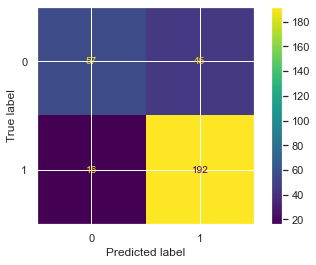

In [48]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

In [49]:
print("Accurancy of logistic dataset after grid search CV: ", best_model.score(X_train, y_train))

Accurancy of logistic dataset after grid search CV:  0.8032258064516129


In [50]:
print("Accurancy of logistic dataset after grid search CV:", best_model.score(X_test, y_test))

Accurancy of logistic dataset after grid search CV: 0.8208955223880597


              precision    recall  f1-score   support

           0       0.78      0.60      0.68        42
           1       0.83      0.92      0.88        92

    accuracy                           0.82       134
   macro avg       0.81      0.76      0.78       134
weighted avg       0.82      0.82      0.81       134
 



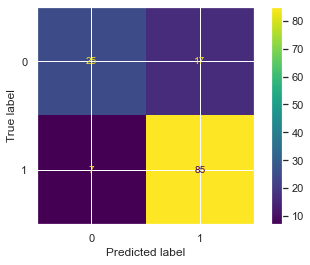

In [51]:
# confusion matrix on test dataset

plot_confusion_matrix(best_model, X_test, y_test )
print(classification_report(y_test, ytest_predict),'\n');

In [52]:
#ROC curve for training dataset after grid search Cv 

ROC_AUC score: 0.830


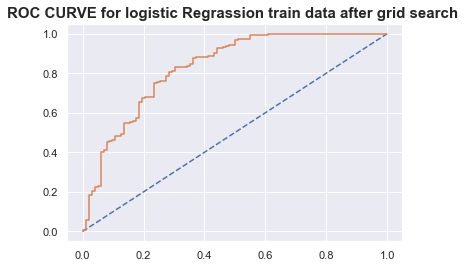

In [53]:
# Predict probability 
probs=best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc=roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

plt.title('ROC CURVE for logistic Regrassion train data after grid search ', fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

In [54]:
#ROC CURVE FOR TESTING DATA AFTER GRID SEARCH

ROC_AUC score: 0.819


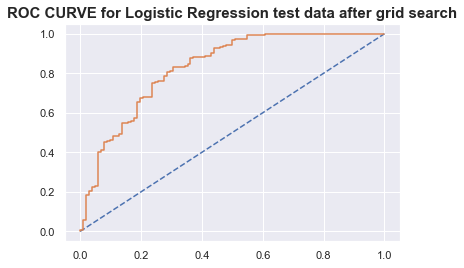

In [55]:
probs_test = best_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('ROC_AUC score: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC CURVE for Logistic Regression test data after grid search',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

# LDA

In [56]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [57]:
LDA_model=LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [58]:
y_train_predict=LDA_model.predict(X_train)
LDA_model_score=LDA_model.score(X_train,y_train)
print(LDA_model_score)
print('')
print(metrics.confusion_matrix(y_train,y_train_predict))
print('')
print(metrics.classification_report(y_train,y_train_predict))

0.8

[[ 57  45]
 [ 17 191]]

              precision    recall  f1-score   support

           0       0.77      0.56      0.65       102
           1       0.81      0.92      0.86       208

    accuracy                           0.80       310
   macro avg       0.79      0.74      0.75       310
weighted avg       0.80      0.80      0.79       310



In [59]:
print('accuracy of train dataset:',LDA_model_score)

accuracy of train dataset: 0.8


In [60]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))


Confusion matrix for the train data
 [[ 57  45]
 [ 17 191]]


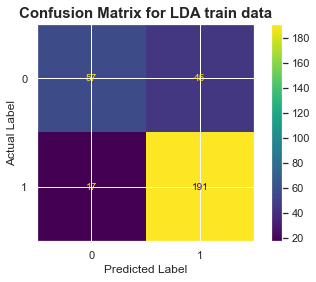

In [61]:
plot_confusion_matrix(LDA_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for LDA train data',fontsize=15,fontweight='bold')
plt.show()

In [62]:
y_test_predict=LDA_model.predict(X_test)
LDA_model_score=LDA_model.score(X_test,y_test)
print(LDA_model_score)
print('')
print(metrics.confusion_matrix(y_test,y_test_predict))
print('')
print(metrics.classification_report(y_test,y_test_predict))

0.8208955223880597

[[26 16]
 [ 8 84]]

              precision    recall  f1-score   support

           0       0.76      0.62      0.68        42
           1       0.84      0.91      0.87        92

    accuracy                           0.82       134
   macro avg       0.80      0.77      0.78       134
weighted avg       0.82      0.82      0.82       134



In [63]:
print('accuracy of test dataset:',LDA_model_score)

accuracy of test dataset: 0.8208955223880597


In [64]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[26 16]
 [ 8 84]]


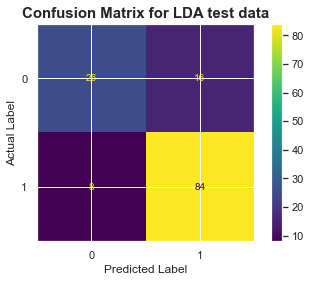

In [65]:
plot_confusion_matrix(LDA_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for LDA test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score : 0.834 


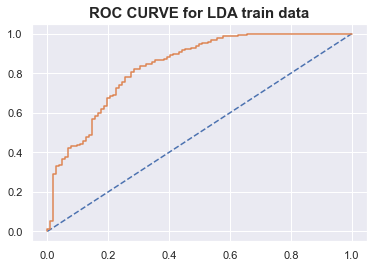

In [66]:
probs_train=LDA_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score : %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for LDA train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);

ROC_AUC score: 0.810 


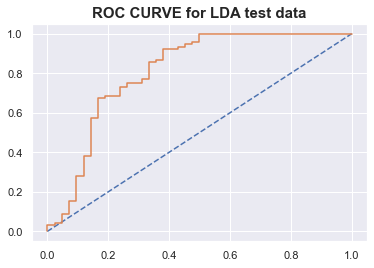

In [67]:
    probs_test=LDA_model.predict_proba(X_test)
    probs_test=probs_test[:,1]
    auc=roc_auc_score(y_test,probs_test)
    print("ROC_AUC score: %.3f " % auc)

    test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.title('ROC CURVE for LDA test data',fontsize=15,fontweight='bold')
    plt.plot(test_fpr, test_tpr);

In [68]:
# View the Intercept and Coefficents:::

print(LDA_model.coef_ )#Prints an array of all regressor values (b1 and b2, or as many bs as your model has)
print(LDA_model.intercept_)  #Prints value for intercept/b0 
print(pd.DataFrame(zip(X_train.columns, np.transpose(LDA_model.coef_.tolist()[0])), columns=['features', 'coef']))

# Due to the logit function, logistic regression coefficients represent the log odds that an observation is in the target 
# class (“1”) given the values of its X variables. Thus, these log odd coefficients need to be converted to regular odds 
# in order to make sense of them. This is done by simply exponentiating the log odds coefficients - using np.exp()

odds = np.exp(LDA_model.coef_[0])
pd.DataFrame(odds, 
             X_train.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)


[[ 0.31405083  1.37043247 -0.34447293  0.41222337 -0.20427415 -0.05964326
  -0.22453106 -2.73344538]]
[-3.00532818]
   features      coef
0       Age  0.314051
1    Gender  1.370432
2  Engineer -0.344473
3       MBA  0.412223
4  Work Exp -0.204274
5    Salary -0.059643
6  Distance -0.224531
7   license -2.733445


,coef
Gender,3.937053
MBA,1.510172
Age,1.368959
Salary,0.942101
Work Exp,0.815239
Distance,0.798891
Engineer,0.708594
license,0.064995


Feature: 0, Score: 0.31405
Feature: 1, Score: 1.37043
Feature: 2, Score: -0.34447
Feature: 3, Score: 0.41222
Feature: 4, Score: -0.20427
Feature: 5, Score: -0.05964
Feature: 6, Score: -0.22453
Feature: 7, Score: -2.73345


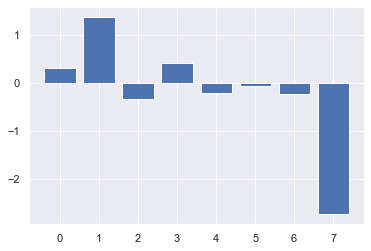

In [69]:
# get importance
from matplotlib import pyplot
importance = LDA_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [70]:
print(LDA_model.coef_)

[[ 0.31405083  1.37043247 -0.34447293  0.41222337 -0.20427415 -0.05964326
  -0.22453106 -2.73344538]]


In [71]:
#Applying Grid Search CV on LDA data

In [72]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_jobs=1, # need more disk? PickleError
                                  learning_method='online'
                               )

In [73]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_components': [6, 8, 10, 12], # Maybe we can get away with fewer n_components (memory)
    'learning_decay': [0.75, 0.80, 0.85]
}

lda_search = GridSearchCV(lda,
                          param_grid=params,
                          cv=3,
                          return_train_score=False)

In [74]:
lda_search.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=LatentDirichletAllocation(learning_method='online',
                                                 n_jobs=1),
             param_grid={'learning_decay': [0.75, 0.8, 0.85],
                         'n_components': [6, 8, 10, 12]})

In [75]:
print(lda_search.best_params_,'\n')
print(lda_search.best_estimator_)

{'learning_decay': 0.85, 'n_components': 6} 

LatentDirichletAllocation(learning_decay=0.85, learning_method='online',
                          n_components=6, n_jobs=1)


In [76]:
best_model = lda_search.best_estimator_

In [78]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

AttributeError: 'LatentDirichletAllocation' object has no attribute 'predict'

In [79]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

AttributeError: 'LatentDirichletAllocation' object has no attribute 'predict_proba'

In [80]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

ValueError: plot_confusion_matrix only supports classifiers

In [81]:
#NAIVE BAYES

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [83]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [84]:
y_train_predict=NB_model.predict(X_train)
NB_model_score=NB_model.score(X_train, y_train)
print(NB_model_score)
print(metrics.confusion_matrix(y_train,y_train_predict))

print(metrics.classification_report(y_train,y_train_predict))

0.7935483870967742
[[ 51  51]
 [ 13 195]]
              precision    recall  f1-score   support

           0       0.80      0.50      0.61       102
           1       0.79      0.94      0.86       208

    accuracy                           0.79       310
   macro avg       0.79      0.72      0.74       310
weighted avg       0.79      0.79      0.78       310



In [85]:
print('accuracy of train dataset:',NB_model_score)

accuracy of train dataset: 0.7935483870967742


In [86]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[ 51  51]
 [ 13 195]]


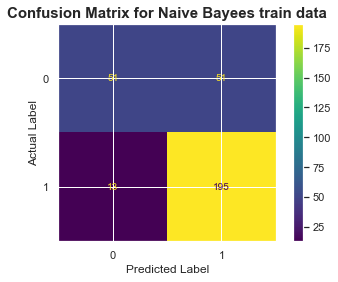

In [87]:
plot_confusion_matrix(NB_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Naive Bayees train data',fontsize=15,fontweight='bold')
plt.show()

In [88]:
y_test_predict=NB_model.predict(X_test)
model_score=NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test,y_test_predict))

print(metrics.classification_report(y_test,y_test_predict))

0.7910447761194029
[[22 20]
 [ 8 84]]
              precision    recall  f1-score   support

           0       0.73      0.52      0.61        42
           1       0.81      0.91      0.86        92

    accuracy                           0.79       134
   macro avg       0.77      0.72      0.73       134
weighted avg       0.78      0.79      0.78       134



In [89]:
print('accuracy of test dataset:',NB_model_score)

accuracy of test dataset: 0.7935483870967742


In [90]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[22 20]
 [ 8 84]]


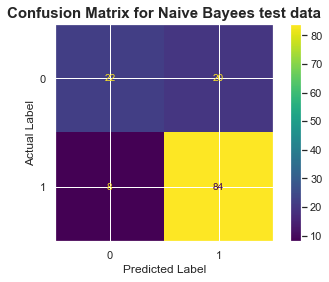

In [91]:
plot_confusion_matrix(NB_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Naive Bayees test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score: 0.798 


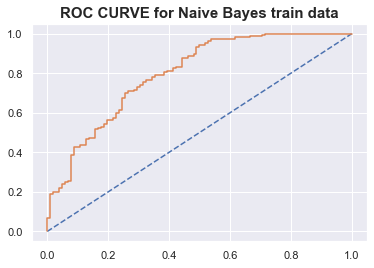

In [92]:
probs_train=NB_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score: %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Naive Bayes train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);

ROC_AUC score: 0.766 


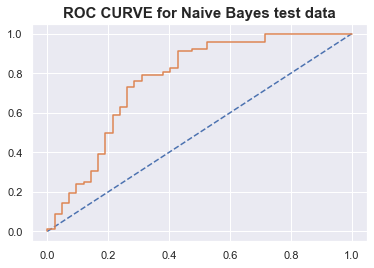

In [112]:
probs_test=NB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score: %.3f " % auc)

test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Naive Bayes test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr)

In [113]:
#KNN

In [93]:
from scipy.stats import zscore

In [95]:
df_scaled = X.apply(zscore)
display(df_scaled.head())


df_scaled_test = x_test.apply(zscore)
display(df_scaled_test.head())

,Age,Gender,Engineer,MBA,Work Exp,Salary,Distance,license
0,0.057178,0.636446,-1.753110,-0.580818,-0.450332,-0.185666,-2.255137,-0.553066
1,-1.076164,-1.571226,0.570415,-0.580818,-0.450332,-0.760265,-2.227375,-0.553066
2,0.283846,0.636446,0.570415,-0.580818,0.137173,-0.271856,-2.005282,-0.553066
3,0.057178,-1.571226,0.570415,1.721710,-0.254497,-0.271856,-1.894235,-0.553066
4,-0.169491,0.636446,0.570415,-0.580818,-0.450332,-0.271856,-1.866473,-0.553066


NameError: name 'x_test' is not defined

In [118]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)


KNeighborsClassifier()

In [119]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8387096774193549
[[ 65  37]
 [ 13 195]]
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       102
           1       0.84      0.94      0.89       208

    accuracy                           0.84       310
   macro avg       0.84      0.79      0.80       310
weighted avg       0.84      0.84      0.83       310



In [120]:
print('accuracy of train dataset:',KNN_model_score)

accuracy of train dataset: 0.8387096774193549


In [121]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[ 65  37]
 [ 13 195]]


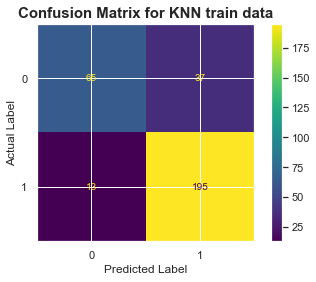

In [122]:
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN train data',fontsize=15,fontweight='bold')
plt.show()

In [123]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7388059701492538
[[21 21]
 [14 78]]
              precision    recall  f1-score   support

           0       0.60      0.50      0.55        42
           1       0.79      0.85      0.82        92

    accuracy                           0.74       134
   macro avg       0.69      0.67      0.68       134
weighted avg       0.73      0.74      0.73       134



In [124]:
print('accuracy of test dataset:',KNN_model_score)

accuracy of test dataset: 0.7388059701492538


In [125]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test, y_test_predict))

Confusion matrix for the test data
 [[21 21]
 [14 78]]


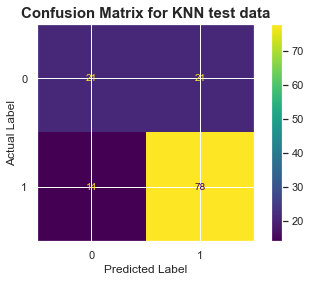

In [126]:
plot_confusion_matrix(KNN_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score: 0.923 


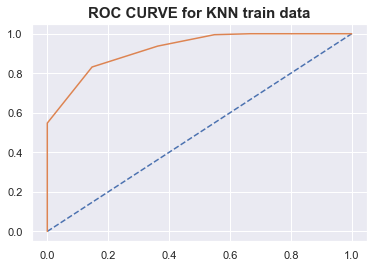

In [127]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score: %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);

ROC_AUC score:0.754 


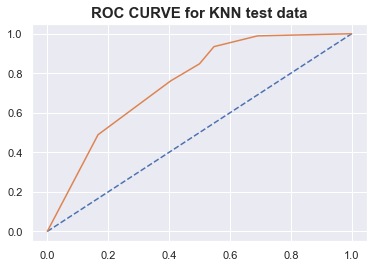

In [128]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score:%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

In [129]:
#Applying grid Search on KNN data

#for n_neighbours/k=7

from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [130]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8354838709677419
[[ 64  38]
 [ 13 195]]
              precision    recall  f1-score   support

           0       0.83      0.63      0.72       102
           1       0.84      0.94      0.88       208

    accuracy                           0.84       310
   macro avg       0.83      0.78      0.80       310
weighted avg       0.84      0.84      0.83       310



In [131]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.746268656716418
[[21 21]
 [13 79]]
              precision    recall  f1-score   support

           0       0.62      0.50      0.55        42
           1       0.79      0.86      0.82        92

    accuracy                           0.75       134
   macro avg       0.70      0.68      0.69       134
weighted avg       0.74      0.75      0.74       134



In [133]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.24626865671641796,
 0.23134328358208955,
 0.26119402985074625,
 0.25373134328358204,
 0.24626865671641796,
 0.26119402985074625,
 0.23134328358208955,
 0.26119402985074625,
 0.27611940298507465,
 0.27611940298507465]

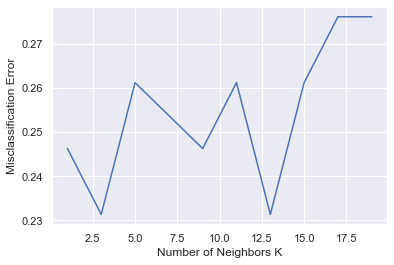

In [134]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [135]:
#for k=19

In [136]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=19)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [137]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7903225806451613
[[ 49  53]
 [ 12 196]]
              precision    recall  f1-score   support

           0       0.80      0.48      0.60       102
           1       0.79      0.94      0.86       208

    accuracy                           0.79       310
   macro avg       0.80      0.71      0.73       310
weighted avg       0.79      0.79      0.77       310



In [138]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7238805970149254
[[17 25]
 [12 80]]
              precision    recall  f1-score   support

           0       0.59      0.40      0.48        42
           1       0.76      0.87      0.81        92

    accuracy                           0.72       134
   macro avg       0.67      0.64      0.65       134
weighted avg       0.71      0.72      0.71       134



In [139]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, y_test)
print(KNN_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7238805970149254
[[17 25]
 [12 80]]
              precision    recall  f1-score   support

           0       0.59      0.40      0.48        42
           1       0.76      0.87      0.81        92

    accuracy                           0.72       134
   macro avg       0.67      0.64      0.65       134
weighted avg       0.71      0.72      0.71       134



In [140]:
#for k=17

In [141]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [142]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
KNN_model_score = KNN_model.score(X_train, y_train)
print(KNN_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.7903225806451613
[[ 51  51]
 [ 14 194]]
              precision    recall  f1-score   support

           0       0.78      0.50      0.61       102
           1       0.79      0.93      0.86       208

    accuracy                           0.79       310
   macro avg       0.79      0.72      0.73       310
weighted avg       0.79      0.79      0.78       310



In [143]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
KNN_model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7238805970149254
[[17 25]
 [12 80]]
              precision    recall  f1-score   support

           0       0.59      0.40      0.48        42
           1       0.76      0.87      0.81        92

    accuracy                           0.72       134
   macro avg       0.67      0.64      0.65       134
weighted avg       0.71      0.72      0.71       134



In [144]:
#for k=13

In [145]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [146]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8129032258064516
[[ 57  45]
 [ 13 195]]
              precision    recall  f1-score   support

           0       0.81      0.56      0.66       102
           1       0.81      0.94      0.87       208

    accuracy                           0.81       310
   macro avg       0.81      0.75      0.77       310
weighted avg       0.81      0.81      0.80       310



In [147]:
print("Accuracy of the KNN train data for k=13",KNN_model.score(X_train, y_train))

Accuracy of the KNN train data for k=13 0.8129032258064516


In [148]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7686567164179104
[[22 20]
 [11 81]]
              precision    recall  f1-score   support

           0       0.67      0.52      0.59        42
           1       0.80      0.88      0.84        92

    accuracy                           0.77       134
   macro avg       0.73      0.70      0.71       134
weighted avg       0.76      0.77      0.76       134



In [149]:
print("Accuracy of the KNN test data for k=13",KNN_model.score(X_test, y_test))

Accuracy of the KNN test data for k=13 0.7686567164179104


ROC_AUC score: 0.868 


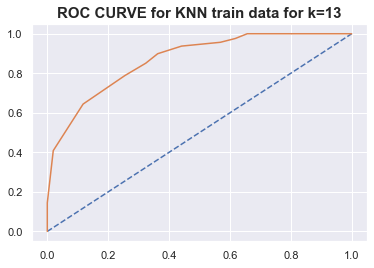

In [150]:
probs_train=KNN_model.predict_proba(X_train)
probs_train=probs_train[:, 1]
auc=roc_auc_score(y_train,probs_train)
print("ROC_AUC score: %.3f " % auc)
train_fpr ,train_tpr, train_thresholds= roc_curve(y_train,probs_train)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN train data for k=13',fontsize=15,fontweight='bold')
plt.plot(train_fpr,train_tpr);

ROC_AUC score:0.755 


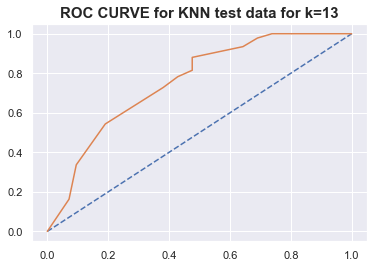

In [151]:
probs_test=KNN_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score:%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for KNN test data for k=13',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

Confusion matrix for the train data for k=13
 [[ 57  45]
 [ 13 195]]


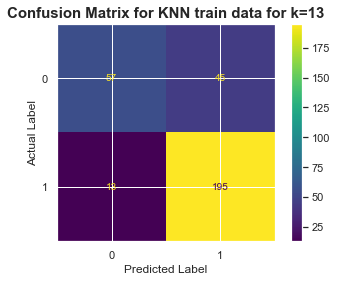

In [152]:
print('Confusion matrix for the train data for k=13\n',metrics.confusion_matrix(y_train,y_train_predict))
plot_confusion_matrix(KNN_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN train data for k=13',fontsize=15,fontweight='bold')
plt.show()

Confusion matrix for the test data for k=13
 [[22 20]
 [11 81]]


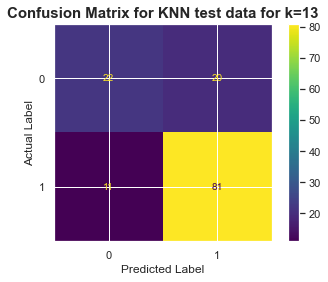

In [153]:
print('Confusion matrix for the test data for k=13\n',metrics.confusion_matrix(y_test, y_test_predict))
plot_confusion_matrix(KNN_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for KNN test data for k=13',fontsize=15,fontweight='bold')
plt.show()

In [154]:
from sklearn.datasets import make_classification
from matplotlib import pyplot
# get importance
importance = KNN_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

AttributeError: 'KNeighborsClassifier' object has no attribute 'coef_'

# ADA BOOST

In [97]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [98]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
ADA_model_score = ADB_model.score(X_train, y_train)
print(ADA_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8838709677419355
[[ 77  25]
 [ 11 197]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       102
           1       0.89      0.95      0.92       208

    accuracy                           0.88       310
   macro avg       0.88      0.85      0.86       310
weighted avg       0.88      0.88      0.88       310



In [99]:
print('accuracy of train dataset:',ADA_model_score)

accuracy of train dataset: 0.8838709677419355


In [159]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[ 70  32]
 [ 11 197]]


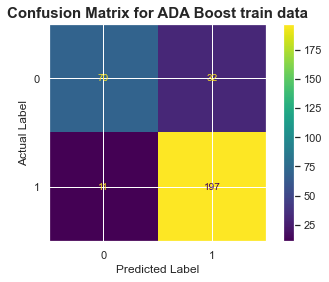

In [160]:
plot_confusion_matrix(ADB_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for ADA Boost train data',fontsize=15,fontweight='bold')
plt.show()

In [161]:
y_test_prob=ADB_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.495707,0.504293
1,0.486651,0.513349
2,0.493247,0.506753
3,0.492490,0.507510
4,0.503419,0.496581


ROC_AUC score: 0.949


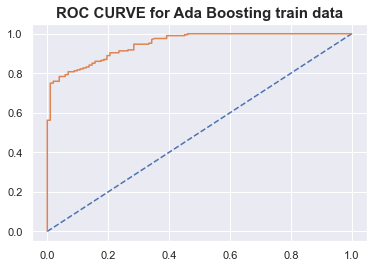

In [162]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Ada Boosting train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

In [100]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
ADA_model_score = ADB_model.score(X_test, y_test)
print(ADA_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7910447761194029
[[26 16]
 [12 80]]
              precision    recall  f1-score   support

           0       0.68      0.62      0.65        42
           1       0.83      0.87      0.85        92

    accuracy                           0.79       134
   macro avg       0.76      0.74      0.75       134
weighted avg       0.79      0.79      0.79       134



In [101]:
print('accuracy of test dataset:',ADA_model_score)

accuracy of test dataset: 0.7910447761194029


In [165]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))


Confusion matrix for the test data
 [[25 17]
 [10 82]]


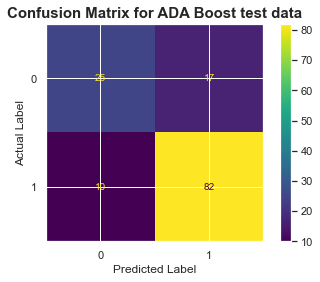

In [166]:
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for ADA Boost test data',fontsize=15,fontweight='bold')
plt.show()

In [167]:
y_test_prob=ADB_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.495707,0.504293
1,0.486651,0.513349
2,0.493247,0.506753
3,0.492490,0.507510
4,0.503419,0.496581


ROC_AUC score: 0.949


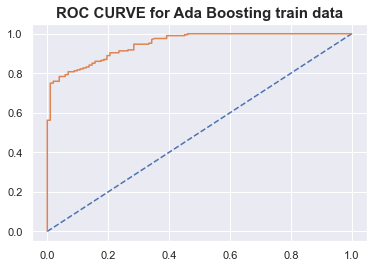

In [168]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Ada Boosting train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

In [169]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
ADA_model_score = ADB_model.score(X_test, y_test)
print(ADA_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7985074626865671
[[25 17]
 [10 82]]
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        42
           1       0.83      0.89      0.86        92

    accuracy                           0.80       134
   macro avg       0.77      0.74      0.75       134
weighted avg       0.79      0.80      0.79       134



In [102]:
print('accuracy of test dataset:',ADA_model_score)

accuracy of test dataset: 0.7910447761194029


In [171]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[25 17]
 [10 82]]


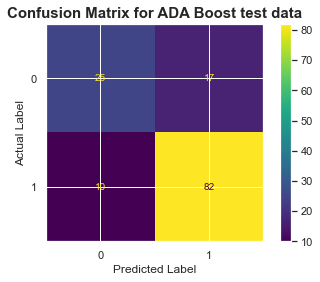

In [172]:
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for ADA Boost test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score:0.786 


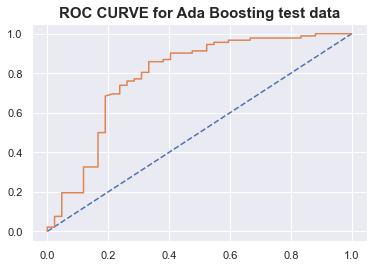

In [173]:
probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score:%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Ada Boosting test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

AUC: 0.949
AUC :0.786 


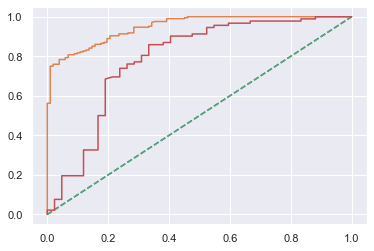

In [174]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("AUC :%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

In [104]:
#GRADIENT BOOSTING

In [105]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [106]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
GDCL_model_score = gbcl.score(X_train, y_train)
print(GDCL_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.967741935483871
[[ 93   9]
 [  1 207]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       102
           1       0.96      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.97      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310



In [107]:
print('accuracy of train dataset:',GDCL_model_score)

accuracy of train dataset: 0.967741935483871


In [108]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[ 93   9]
 [  1 207]]


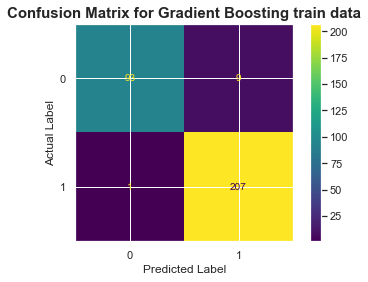

In [109]:
plot_confusion_matrix(gbcl,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Gradient Boosting train data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score: 0.998


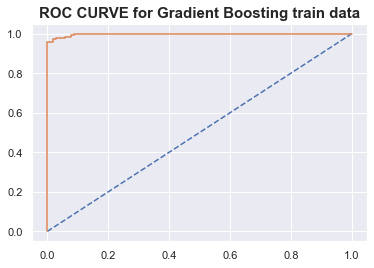

In [110]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Gradient Boosting train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

In [111]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
GDCL_model_score = gbcl.score(X_test, y_test)
print(GDCL_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7686567164179104
[[25 17]
 [14 78]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        42
           1       0.82      0.85      0.83        92

    accuracy                           0.77       134
   macro avg       0.73      0.72      0.73       134
weighted avg       0.76      0.77      0.77       134



In [112]:
print('accuracy of test dataset:',GDCL_model_score)

accuracy of test dataset: 0.7686567164179104


In [113]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[25 17]
 [14 78]]


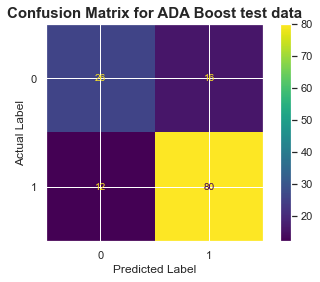

In [114]:
plot_confusion_matrix(ADB_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for ADA Boost test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score:0.786 


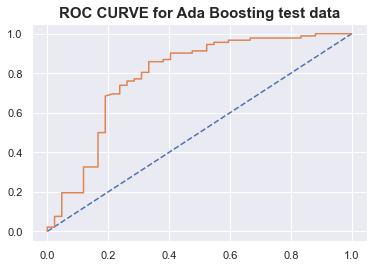

In [186]:
probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score:%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Ada Boosting test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

AUC: 0.959
AUC :0.809 


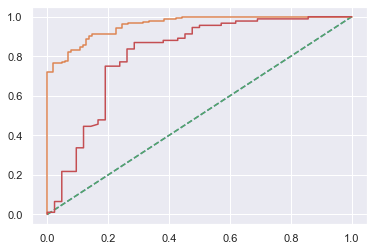

In [115]:
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

probs_test=ADB_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("AUC :%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(test_fpr, test_tpr);

In [188]:
#GRADIENT BOOSTING

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [117]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.967741935483871
[[ 93   9]
 [  1 207]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       102
           1       0.96      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.97      0.95      0.96       310
weighted avg       0.97      0.97      0.97       310



In [118]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.967741935483871


In [119]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[ 93   9]
 [  1 207]]


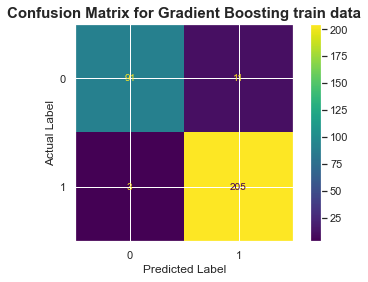

In [193]:
plot_confusion_matrix(gbcl,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Gradient Boosting train data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score: 0.998


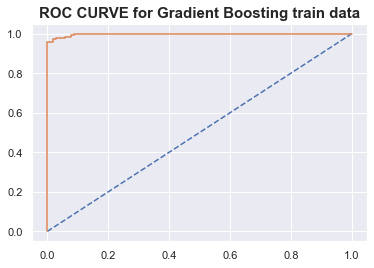

In [120]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Gradient Boosting train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

In [123]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
GDCL_model_score = gbcl.score(X_test, y_test)
print(GDCL_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7686567164179104
[[25 17]
 [14 78]]
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        42
           1       0.82      0.85      0.83        92

    accuracy                           0.77       134
   macro avg       0.73      0.72      0.73       134
weighted avg       0.76      0.77      0.77       134



In [124]:
print('accuracy of test dataset:',GDCL_model_score)

accuracy of test dataset: 0.7686567164179104


In [197]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[25 17]
 [12 80]]


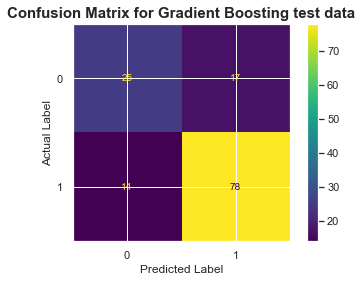

In [125]:
plot_confusion_matrix(gbcl,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Gradient Boosting test data',fontsize=15,fontweight='bold')
plt.show()

ROC_AUC score :0.775 


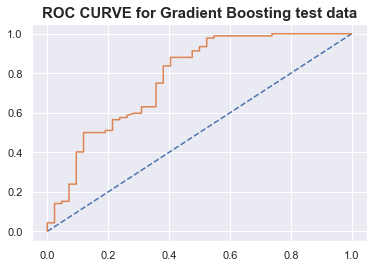

In [199]:
probs_test=gbcl.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score :%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Gradient Boosting test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

In [200]:
#DECISION TREE

In [126]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [202]:
print('accuracy of train dataset:',model_score)

accuracy of train dataset: 0.7835820895522388


In [203]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[ 91  11]
 [  3 205]]


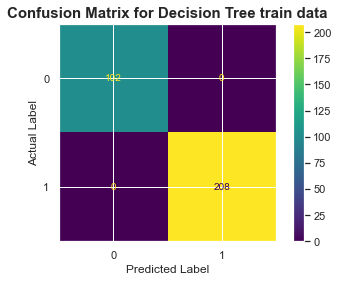

In [204]:
plot_confusion_matrix(DT_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Decision Tree train data',fontsize=15,fontweight='bold')
plt.show()

In [127]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
DT_model_score = DT_model.score(X_test, y_test)
print(DT_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7835820895522388
[[30 12]
 [17 75]]
              precision    recall  f1-score   support

           0       0.64      0.71      0.67        42
           1       0.86      0.82      0.84        92

    accuracy                           0.78       134
   macro avg       0.75      0.76      0.76       134
weighted avg       0.79      0.78      0.79       134



In [128]:
print('accuracy of test dataset:',DT_model_score)

accuracy of test dataset: 0.7835820895522388


In [129]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[30 12]
 [17 75]]


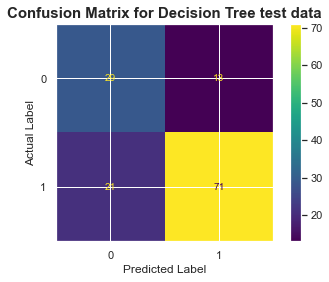

In [208]:
plot_confusion_matrix(DT_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Decision Tree test data',fontsize=15,fontweight='bold')
plt.show()

In [209]:
#RANDOM FOREST

In [131]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)   

RandomForestClassifier(random_state=1)

In [132]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
RF_model_score =RF_model.score(X_train, y_train)
print(RF_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[102   0]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [133]:
print('accuracy of train dataset:',RF_model_score)

accuracy of train dataset: 1.0


In [134]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[102   0]
 [  0 208]]


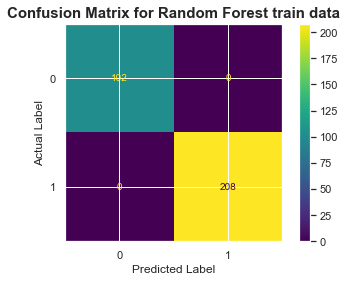

In [135]:
plot_confusion_matrix(RF_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Random Forest train data',fontsize=15,fontweight='bold')
plt.show()

In [137]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
RF_model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8059701492537313
[[26 16]
 [10 82]]
              precision    recall  f1-score   support

           0       0.72      0.62      0.67        42
           1       0.84      0.89      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.76      0.76       134
weighted avg       0.80      0.81      0.80       134



In [138]:
print('accuracy of test dataset:',RF_model_score)

accuracy of test dataset: 0.8059701492537313


In [217]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[27 15]
 [12 80]]


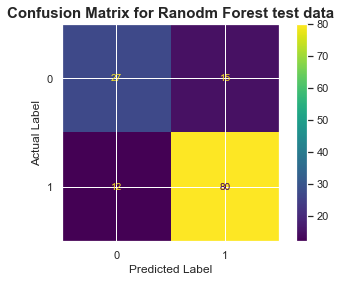

In [218]:
plot_confusion_matrix(RF_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Ranodm Forest test data',fontsize=15,fontweight='bold')
plt.show()

In [219]:
#APLLYING GRID SEARCH CV ON RANDOM FOREST

In [139]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [140]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [141]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}

In [142]:
best_grid = grid_search.best_estimator_

In [143]:
best_grid

RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=200, random_state=0)

In [144]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [145]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.60      0.72       102
           1       0.83      0.97      0.90       208

    accuracy                           0.85       310
   macro avg       0.87      0.78      0.81       310
weighted avg       0.86      0.85      0.84       310



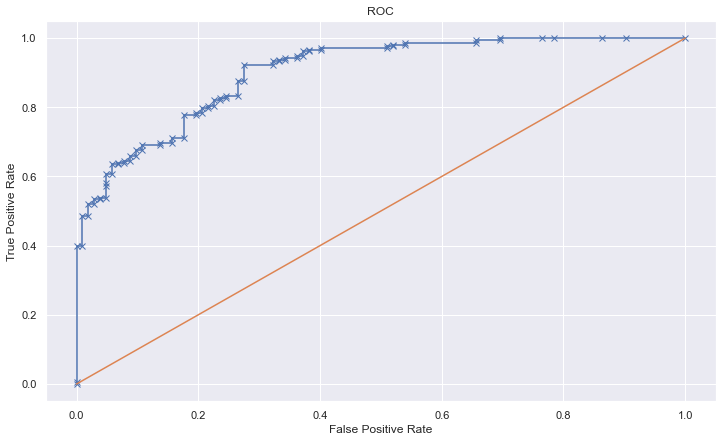

Area under Curve is 0.9019607843137255


In [146]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

In [154]:
confusion_matrix(y_test,ytest_predict)

array([[22, 20],
       [ 9, 83]], dtype=int64)

In [155]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.52      0.60        42
           1       0.81      0.90      0.85        92

    accuracy                           0.78       134
   macro avg       0.76      0.71      0.73       134
weighted avg       0.78      0.78      0.77       134



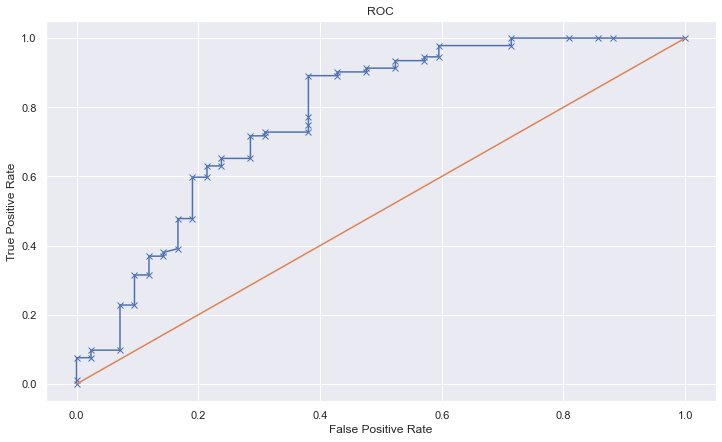

Area under Curve is 0.776268115942029


In [156]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

In [157]:
#BAGGING ON CART

In [158]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [159]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
BG_model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[102   0]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       208

    accuracy                           1.00       310
   macro avg       1.00      1.00      1.00       310
weighted avg       1.00      1.00      1.00       310



In [160]:
print('accuracy of train dataset:',BG_model_score)

accuracy of train dataset: 1.0


In [161]:
print('Confusion matrix for the train data\n',metrics.confusion_matrix(y_train,y_train_predict))

Confusion matrix for the train data
 [[102   0]
 [  0 208]]


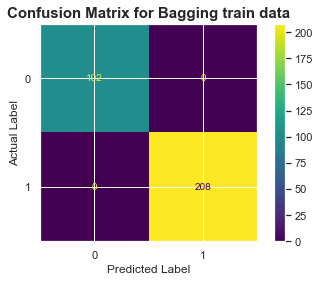

In [162]:
plot_confusion_matrix(Bagging_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging train data',fontsize=15,fontweight='bold')
plt.show()

In [164]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
BG_model_score = Bagging_model.score(X_test, y_test)
print(BG_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8134328358208955
[[29 13]
 [12 80]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70        42
           1       0.86      0.87      0.86        92

    accuracy                           0.81       134
   macro avg       0.78      0.78      0.78       134
weighted avg       0.81      0.81      0.81       134



In [165]:
print('accuracy of test dataset:',BG_model_score)

accuracy of test dataset: 0.8134328358208955


In [166]:
print('Confusion matrix for the test data\n',metrics.confusion_matrix(y_test,y_test_predict))

Confusion matrix for the test data
 [[29 13]
 [12 80]]


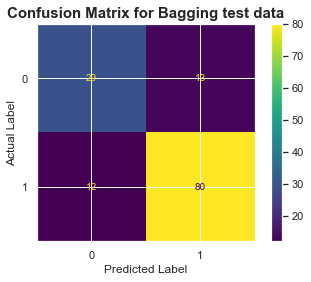

In [167]:
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging test data',fontsize=15,fontweight='bold')
plt.show()

In [168]:
#BAGGING ON RANDOM FOREST

In [169]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50,max_depth=10,min_samples_leaf=10,
                       min_samples_split=50,  random_state=0,max_features=6)
rfcl = rfcl.fit(X_train, y_train)
  #n- estimators s the number of trees in the forest

0.8134328358208955


<AxesSubplot:>

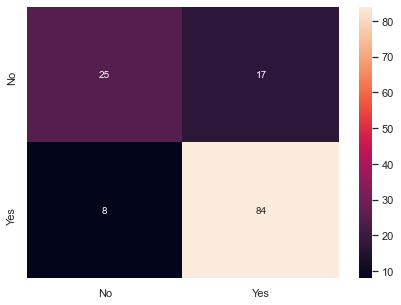

In [243]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [170]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
#rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=6)
#rfcl = rfcl.fit(X_train, y_train)
rfcl = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=rfcl,n_estimators=50,random_state=0)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=50,
                  random_state=0)

In [171]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
BGG_model_score =Bagging_model.score(X_train, y_train)
print(BGG_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9741935483870968
[[ 94   8]
 [  0 208]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96       102
           1       0.96      1.00      0.98       208

    accuracy                           0.97       310
   macro avg       0.98      0.96      0.97       310
weighted avg       0.98      0.97      0.97       310



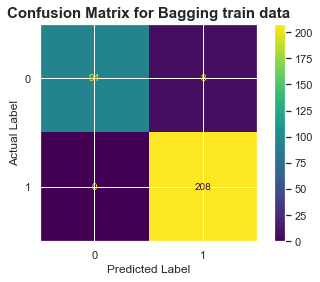

In [172]:
plot_confusion_matrix(Bagging_model,X_train,y_train);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging train data',fontsize=15,fontweight='bold')
plt.show()

In [173]:
print("Accuracy on Bagging train data:",Bagging_model.score(X_train, y_train))

Accuracy on Bagging train data: 0.9741935483870968


In [174]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
BGG_model_score = Bagging_model.score(X_test, y_test)
print(BGG_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8134328358208955
[[24 18]
 [ 7 85]]
              precision    recall  f1-score   support

           0       0.77      0.57      0.66        42
           1       0.83      0.92      0.87        92

    accuracy                           0.81       134
   macro avg       0.80      0.75      0.76       134
weighted avg       0.81      0.81      0.80       134



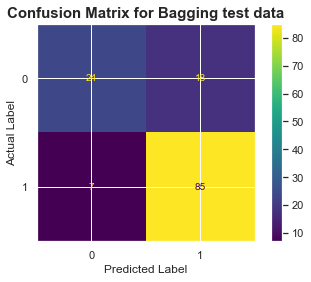

In [175]:
plot_confusion_matrix(Bagging_model,X_test,y_test);
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Bagging test data',fontsize=15,fontweight='bold')
plt.show()

In [176]:
print("Accuracy on Bagging test data:",Bagging_model.score(X_test, y_test))

Accuracy on Bagging test data: 0.8134328358208955


ROC_AUC score: 1.000


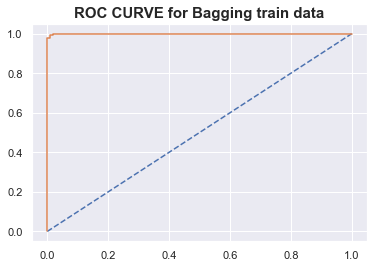

In [177]:
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('ROC_AUC score: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.title('ROC CURVE for Bagging train data',fontsize=15,fontweight='bold')
plt.plot(train_fpr, train_tpr);

ROC_AUC score :0.836 


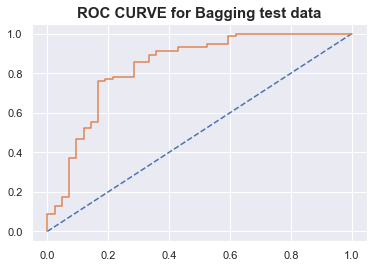

In [178]:
probs_test=Bagging_model.predict_proba(X_test)
probs_test=probs_test[:,1]
auc=roc_auc_score(y_test,probs_test)
print("ROC_AUC score :%.3f " % auc)
test_fpr,test_tpr,test_threshold=roc_curve(y_test,probs_test)
plt.plot([0,1],[0,1],linestyle='--')
plt.title('ROC CURVE for Bagging test data',fontsize=15,fontweight='bold')
plt.plot(test_fpr, test_tpr);

In [179]:
#CROSS VALIDATION ON ALL THE ABOVE CREATED MODELS
#1.LOGISTIC REGRESSION

In [254]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Logistic_model, X_train, y_train, cv=10)
scores

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.3s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

array([0.87096774, 0.80645161, 0.74193548, 0.67741935, 0.80645161,
       0.80645161, 0.67741935, 0.77419355, 0.77419355, 0.80645161])

In [255]:
scores = cross_val_score(Logistic_model, X_test, y_test, cv=10)
scores

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:   

array([0.92857143, 0.78571429, 0.71428571, 0.85714286, 0.69230769,
       0.69230769, 0.84615385, 0.76923077, 0.84615385, 0.69230769])

# LDA
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LDA_model, X_train, y_train, cv=10) scores

In [256]:
scores = cross_val_score(LDA_model, X_test, y_test, cv=10)
scores

array([0.92857143, 0.78571429, 0.64285714, 0.85714286, 0.69230769,
       0.69230769, 0.84615385, 0.84615385, 0.84615385, 0.69230769])

# NAIVE BAYES

In [257]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_model, X_train, y_train, cv=10)
scores

array([0.87096774, 0.77419355, 0.90322581, 0.67741935, 0.80645161,
       0.80645161, 0.67741935, 0.70967742, 0.83870968, 0.67741935])

In [258]:
scores = cross_val_score(NB_model, X_test, y_test, cv=10)
scores

array([0.92857143, 0.78571429, 0.71428571, 0.78571429, 0.76923077,
       0.76923077, 0.84615385, 0.84615385, 0.84615385, 0.61538462])

# KNN

In [259]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNN_model, X_train, y_train, cv=10)
scores

array([0.87096774, 0.83870968, 0.74193548, 0.83870968, 0.80645161,
       0.70967742, 0.70967742, 0.74193548, 0.74193548, 0.77419355])

In [260]:
scores = cross_val_score(KNN_model, X_test, y_test, cv=10)
scores

array([0.85714286, 0.71428571, 0.64285714, 0.71428571, 0.84615385,
       0.61538462, 0.84615385, 0.84615385, 0.76923077, 0.53846154])

# ADA BOOSTING

In [262]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ADB_model, X_train, y_train, cv=10)
scores

array([0.83870968, 0.83870968, 0.80645161, 0.61290323, 0.77419355,
       0.77419355, 0.64516129, 0.80645161, 0.74193548, 0.64516129])

In [263]:
scores = cross_val_score(ADB_model, X_test, y_test, cv=10)
scores

array([0.92857143, 0.78571429, 0.85714286, 0.71428571, 0.69230769,
       0.61538462, 0.84615385, 0.69230769, 0.76923077, 0.69230769])

# GRADIENT BOOSTING

In [264]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbcl, X_train, y_train, cv=10)
scores

array([0.90322581, 0.80645161, 0.74193548, 0.67741935, 0.83870968,
       0.77419355, 0.67741935, 0.80645161, 0.80645161, 0.67741935])

In [265]:
scores = cross_val_score(gbcl, X_test, y_test, cv=10)
scores

array([0.78571429, 0.78571429, 0.64285714, 0.64285714, 0.69230769,
       0.61538462, 0.76923077, 0.76923077, 0.76923077, 0.69230769])

# RANDOM FOREST

In [266]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, X_train, y_train, cv=10)
scores

array([0.90322581, 0.83870968, 0.77419355, 0.74193548, 0.80645161,
       0.74193548, 0.70967742, 0.74193548, 0.87096774, 0.74193548])

In [267]:
scores = cross_val_score(RF_model, X_test, y_test, cv=10)
scores

array([0.92857143, 0.78571429, 0.78571429, 0.71428571, 0.69230769,
       0.53846154, 0.84615385, 0.84615385, 0.84615385, 0.92307692])

# BAGGING ON RANDOM FOREST

In [268]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Bagging_model, X_train, y_train, cv=10)
scores

array([0.90322581, 0.87096774, 0.80645161, 0.77419355, 0.77419355,
       0.80645161, 0.74193548, 0.74193548, 0.83870968, 0.67741935])

In [269]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10)
scores

array([1.        , 0.78571429, 0.71428571, 0.71428571, 0.69230769,
       0.69230769, 0.84615385, 0.84615385, 0.84615385, 0.69230769])

In [206]:
#1.4 Which model performs the best?

In [251]:
model=[Logistic_model_score*100,
LDA_model_score*100,
NB_model_score*100,
ADA_model_score*100,
DT_model_score*100,
RF_model_score*100,
BGG_model_score*100]



In [252]:
label=['LG','LDA','NB','ADA','DT','RF','BGG']

In [253]:
labels=label
fig=go.Figure(data=[go.Pie(labels=label, values=model, hole=0.3
                           ,scalegroup='one')])

fig.update_layout(
    title_text='Europe',
    title_font_color='white',
    legend_title_font_color='yellow',
    plot_bgcolor='black',
    font_color='white',
    paper_bgcolor="black",
    
          )
fig.show()

<BarContainer object of 7 artists>

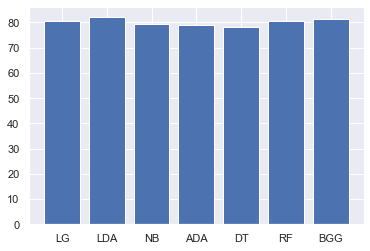

In [254]:
plt.bar(label,model)

In [207]:
#1.5 What are your business insights?

In [208]:
#2.1 Pick out the Deal (Dependent Variable) and Description columns into a separate data frame. 


In [209]:
!pip install wordcloud

In [210]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
import matplotlib

stop_words = stopwords.words()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rekha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rekha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [211]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rekha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rekha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [212]:
import pandas as pd
import numpy as np
import os

In [214]:
df = pd.read_csv('Shark Tank Companies.csv')
df.head()

,deal,description,episode,category,entrepreneurs,location,website,askedFor,exchangeForStake,valuation,season,shark1,shark2,shark3,shark4,shark5,title,episode-season,Multiple Entreprenuers
0,False,Bluetooth device implant for your ear.,1,Novelties,Darrin Johnson,"St. Paul, MN",NaN,1000000,15,6666667,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ionic Ear,1-1,False
1,True,Retail and wholesale pie factory with two reta...,1,Specialty Food,Tod Wilson,"Somerset, NJ",http://whybake.com/,460000,10,4600000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Mr. Tod's Pie Factory,1-1,False
2,True,Ava the Elephant is a godsend for frazzled par...,1,Baby and Child Care,Tiffany Krumins,"Atlanta, GA",http://www.avatheelephant.com/,50000,15,333333,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Ava the Elephant,1-1,False
3,False,"Organizing, packing, and moving services deliv...",1,Consumer Services,"Nick Friedman, Omar Soliman","Tampa, FL",http://collegehunkshaulingjunk.com/,250000,25,1000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,College Foxes Packing Boxes,1-1,False
4,False,Interactive media centers for healthcare waiti...,1,Consumer Services,Kevin Flannery,"Cary, NC",http://www.wispots.com/,1200000,10,12000000,1,Barbara Corcoran,Robert Herjavec,Kevin O'Leary,Daymond John,Kevin Harrington,Wispots,1-1,False


In [215]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()

deal                      0
description               0
episode                   0
category                  0
entrepreneurs             0
location                  0
website                   0
askedFor                  0
exchangeForStake          0
valuation                 0
season                    0
shark1                    0
shark2                    0
shark3                    0
shark4                    0
shark5                    0
title                     0
episode-season            0
Multiple Entreprenuers    0
dtype: int64

In [216]:
#Pick out the Deal (Dependent Variable) and Description columns into a separate data frame

In [217]:
data = df[["deal","description"]]
display(data)

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...
...,...,...
490,True,Zoom Interiors is a virtual service for interi...
491,True,Spikeball started out as a casual outdoors gam...
492,True,Shark Wheel is out to literally reinvent the w...
493,False,Adriana Montano wants to open the first Cat Ca...


In [219]:
#Create two corpora, one with those who secured a Deal, the other with those who did not secure a deal.


In [220]:
data["deal"]=data["deal"].astype("str")
df_true = pd.DataFrame()
df_false = pd.DataFrame()
grouped=data.groupby(data.deal)
grouped.head()
df_true=grouped.get_group("True")
df_false=grouped.get_group("False")

In [221]:
data.info()
data.describe()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         387 non-null    object
 1   description  387 non-null    object
dtypes: object(2)
memory usage: 9.1+ KB


,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
3,False,"Organizing, packing, and moving services deliv..."
4,False,Interactive media centers for healthcare waiti...
5,True,One of the first entrepreneurs to pitch on Sha...


In [222]:
df_true.info()
df_true.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   deal         204 non-null    object
 1   description  204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


,deal,description
count,204,204
unique,1,203
top,True,"Echo Valley Meats is a retail, online gift cat..."
freq,204,2


In [223]:
df_true.head()

,deal,description
1,True,Retail and wholesale pie factory with two reta...
2,True,Ava the Elephant is a godsend for frazzled par...
5,True,One of the first entrepreneurs to pitch on Sha...
12,True,A line of books written to help children find ...
16,True,Coverplay is a slipcover for children's play y...


In [224]:
df_true.drop(["deal"],axis=1,inplace=True)
df_true

,description
1,Retail and wholesale pie factory with two reta...
2,Ava the Elephant is a godsend for frazzled par...
5,One of the first entrepreneurs to pitch on Sha...
12,A line of books written to help children find ...
16,Coverplay is a slipcover for children's play y...
...,...
489,SynDaver Labs makes synthetic body parts for u...
490,Zoom Interiors is a virtual service for interi...
491,Spikeball started out as a casual outdoors gam...
492,Shark Wheel is out to literally reinvent the w...


In [225]:
df_true["chars"]=df_true["description"].str.len()
df_false["chars"]=df_false["description"].str.len()
sum_true=df_true["chars"].sum()
sum_false=df_false["chars"].sum()
print("True Corpus",sum_true)
print("False Corpus",sum_false)

True Corpus 50302
False Corpus 34899


In [226]:
df_true=df_true.astype("str")
df_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 1 to 494
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  204 non-null    object
 1   chars        204 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [227]:
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
print(stopwords.words('english'))
print("True: ")
nsw_true=[]
for x in df_true["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    for i in tokens_without_sw:
        nsw_true.append(i)
    print(tokens_without_sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

['An', 'online', 'service', 'people', 'buy', 'made-to-order', 'cartoon', 'drawings', 'cats', ',', 'posted', 'website', '.']
['Chord', 'Buddy', 'one-of-a-kind', 'learning', 'system', 'guitar', 'gets', 'playing', 'day', 'one', '.', 'Attach', 'tabs', 'acoustic', 'electric', 'guitar', '(', 'right-handed', ',', 'sorry', '!', ')', "'re", 'ready', 'make', 'music', '.', 'Chord', 'Buddy', 'basically', 'turns', 'real-life', 'guitar', 'one', 'easy', 'play', 'favorite', 'Rock', 'Band', 'Guitar', 'Hero', 'games', '.', 'One', 'time', ',', 'remove', 'hte', 'tabs', 'learn', 'play', 'chords', '.', 'Using', 'included', 'instruction', 'book', ',', 'songbook', ',', 'DVD', 'two-month', 'lesson', 'plan', ',', 'learn', '100', 'songs', '!']
['You', 'Smell', 'Soap', 'luxurious', 'without', 'taking', 'seriously', '.', 'Made', 'natural', 'ingredients', 'like', 'shea', 'butter', 'olive', 'oil', ',', 'You', 'Smell', 'Soap', 'fragrant', 'yet', 'gentle', 'soothing', 'skin', '.', 'Made', 'shea', 'butter', 'olive', 'o

['A', 'lobster', 'roll', 'food', 'truck', 'run', 'two', 'cousins', 'originally', 'Maine', ',', 'operating', 'Southern', 'California', '.']
['Focus', 'Designs', 'maker', 'self-balancing', 'unicycle', ',', 'SBU', 'short', '.', 'The', 'SBU', 'battery-powered', 'unicycle', 'built-in', 'sensors', 'keep', 'rider', 'balanced', 'moving', 'forward', 'need', 'pedaling', '.', 'The', 'rider', 'controls', 'SBU', 'natural', 'leaning', 'motions', ',', 'according', 'company', ',', 'takes', '20-30', 'minutes', 'learn', '.', 'The', 'SBU', 'strong', 'yet', 'lightweight', ',', 'supporting', '300', 'lbs', '.', 'mere', '27-pound', 'frame', 'accelerating', '10mph', '3', 'seconds', '.', 'The', 'SBU', 'reaches', 'max', 'speed', '12.5', 'mph', 'take', 'hills', '30', '%', 'grade', '.']
['A', 'plastic', 'lid', 'turn', 'plate', 'airtight', 'container', 'food', 'storage', '.']
['Cool', 'Wazoo', 'cover', 'redirects', 'heat', 'back', 'source', 'serving', 'five', 'different', 'functions', '.', 'It', 'swing', 'cover', 

['Now', 'business', 'Ry', "'s", 'Ruffery', ',', 'business', 'started', 'Ryan', "'s", 'family', 'adopted', 'rescue', 'beagle', '.', 'The', 'family', 'taken', 'aback', 'poor', 'quality', 'dog', 'treats', 'market', ',', 'decided', 'make', 'better', 'dog', 'biscuit', '.', 'Ryan', ',', '10', 'years', 'old', ',', 'took', 'initiative', 'talk', 'veterinarians', 'test', 'new', 'flavor', 'combinations', ',', 'experimenting', 'mom', "'s", 'help', '.', 'Once', 'settled', 'recipe', ',', 'Ryan', 'took', 'streets', 'sell', 'doggie', 'treats', 'bike', '.', 'Today', ',', 'Ry', "'s", 'Ruffery', 'offers', 'three', 'different', 'flavors', ':', 'cheddar', ',', 'peanut', 'butter', ',', 'pumpkin', 'apple', '.', 'These', 'healthy', 'dog', 'treats', 'sold', 'online', 'pet', 'stores', 'across', 'country', '.']
['Breathometer', 'makes', 'breathalyzer', 'tests', 'accessible', 'consumers', 'leveraging', 'users', "'", 'smartphones', '.', 'Easily', 'plugging', 'smartphone', "'s", 'audio', 'jack', ',', 'Breathometer'

['Love', 'outdoors', 'bummed', 'prospect', 'storing', 'enormous', 'clunky', 'kayaks', '?', 'Oru', 'Kayak', 'sells', 'light-weight', 'foldable', 'kayaks', 'made', 'space-age', 'materials', '.', 'The', 'company', 'uses', 'double-layered', 'polypropylene', ',', 'tough', ',', 'resilient', ',', 'abrasion-resistant', '.', 'The', 'original', 'Oru', 'Kayak', '12', 'feet', 'long', 'folds', 'box', 'measuring', '32x13x28', 'cubic', 'inches', ',', 'weighing', '26', 'pounds', '.']
['Not', 'typical', 'cinnamon', 'roll', 'shop', ',', 'Cinnaholic', 'treats', 'dairy-free', ',', 'lactose-free', ',', 'egg-free', ',', 'cholesterol-free', '100', '%', 'vegan', '.']
['Vice', 'meets', 'virtue', 'new', 'wine', 'spritzer', '.', 'Bon', 'Affair', 'blends', 'California', 'wine', 'purified', 'sparkling', 'water', ',', 'electrolytes', 'create', 'refreshing', 'effervescent', 'beverage', '6.5', '%', 'alcohol', 'volume', 'zero', 'added', 'sugar', '.', 'With', 'half', 'calorie', 'content', 'regular', 'wine', ',', 'Bon',

['Scratch', '&', 'Grain', 'Baking', 'Co.', 'makes', 'wholesome', 'delicious', 'cookie', 'mixes', 'planet', '.', 'These', 'cookie', 'kits', 'bring', 'together', 'best', 'elements', 'baking', 'scratch', 'convenience', 'using', 'prepackaged', 'mixes', '.', 'Unlike', 'typical', 'baking', 'mixes', 'big', 'brands', 'might', 'used', 'seeing', 'grocery', 'store', ',', 'ingredient', 'Scratch', 'Grain', 'Co.', 'mixes', 'come', 'individually', 'packaged', 'within', 'box', '.', 'You', 'get', 'wonderful', 'flavor', 'baked-from-scratch', 'cookies', 'satisfaction', 'ingredients', 'fresh', 'all-natural', '.', 'Scratch', 'Grain', 'Co.', 'offers', 'number', 'different', 'cookie', 'mixes', ',', 'including', 'Chocolate', 'Chip', ',', 'Sugar', 'Cookie', ',', 'Oatmeal', 'Raisin', '.', 'They', 'also', 'introduced', 'three', 'gluten-free', 'mixes', ':', 'Chocolate', 'Truffle', ',', 'Snicker', 'Doodle', ',', 'Chewy', 'Peanut', 'Butter', '.']
['Any', 'gathering', 'improved', 'reusable', 'sticky', 'ties', '!', '

['Zoom', 'Interiors', 'virtual', 'service', 'interior', 'design', 'delivers', 'personalized', 'style', 'accessible', 'price', 'points', '.', 'Users', 'fill', 'survey', 'give', 'Zoom', 'sense', 'style', ',', 'follow', 'free', '15-minute', 'telephone', 'consultation', '.', 'For', '$', '150', ',', 'customers', 'get', 'room', 'designed', 'budgets', 'starting', 'low', '$', '1,000', '.']
['Spikeball', 'started', 'casual', 'outdoors', 'game', ',', 'grown', 'become', 'national', 'sensation', '.', 'Played', '2', 'vs.', '2', 'format', ',', 'teams', 'compete', 'spike', 'ball', 'bouncy', 'net', 'one', 'team', 'ca', "n't", 'return', ',', 'awards', 'opposing', 'team', 'point', '.', 'This', 'nascent', 'sport', 'often', 'described', 'cross', 'beach', 'volleyball', 'foursquare', '.', 'Spikeball', "'s", 'popularity', 'growing', ',', 'currently', 'quarter', 'million', 'players', 'United', 'States', ',', 'well', 'thousand', 'nationally', 'ranked', 'teams', '.']
['Shark', 'Wheel', 'literally', 'reinvent', 

In [228]:
nsw_false=[]
print("False:")
tokens_without_sw_freq=[]
for x in df_false["description"]:
    text_tokens = word_tokenize(x)
    tokens_without_sw = [word for word in text_tokens if not word in stopwords.words('english')]
    print(tokens_without_sw)
    for i in tokens_without_sw:
        nsw_false.append(i)
    print(tokens_without_sw)

False:
['Organizing', ',', 'packing', ',', 'moving', 'services', 'delivered', 'college', 'women', '.']
['Organizing', ',', 'packing', ',', 'moving', 'services', 'delivered', 'college', 'women', '.']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information', '.']
['Interactive', 'media', 'centers', 'healthcare', 'waiting', 'rooms', 'offering', 'patients', 'web', 'access', 'educational', 'information', '.']
['A', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel', '.']
['A', 'mixed', 'martial', 'arts', 'clothing', 'line', 'looking', 'become', 'next', 'big', 'brand', 'active', 'sports', '/', 'streetwear', 'apparel', '.']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'side', 'laptop', 'screen', '.']
['Attach', 'Noted', 'detachable', '``', 'arm', "''", 'holds', 'Post-It', 'notes', 'sid

['Rubber', 'bands', 'increase', 'resistance', 'exercise', 'activities', '.']
['Rubber', 'bands', 'increase', 'resistance', 'exercise', 'activities', '.']
['Pure', 'Ayre', 'Odor', 'Eliminator', 'anyone', 'owns', 'pets', 'ever', 'faced', 'lingering', 'smells', '.', 'What', 'makes', 'Pure', 'Ayre', 'different', 'smell-neutralizing', 'sprays', 'uses', 'natural', 'enzymes', 'break', 'smelly', 'compounds', '.', 'Pure', 'Ayre', 'banishes', 'bad', 'odors', 'without', 'harsh', 'chemicals', ',', 'alcohol', ',', 'bacteria', ',', 'citrus', '.', 'It', "'s", 'effective', 'even', 'offensive', 'smells', ',', 'example', 'vomit', ',', 'skunk', 'spray', ',', 'kennel', 'odors', '.', 'Once', 'buy', 'first', '14', 'oz', '.', '22', 'oz', '.', 'spray', 'bottle', 'Pure', 'Aure', 'Odor', 'Eliminator', ',', 'buy', 'gallon', 'continue', 'reuse', 'bottle', '.']
['Pure', 'Ayre', 'Odor', 'Eliminator', 'anyone', 'owns', 'pets', 'ever', 'faced', 'lingering', 'smells', '.', 'What', 'makes', 'Pure', 'Ayre', 'different',

['Beer-infused', 'ice', 'cream', '.']
['Beer-infused', 'ice', 'cream', '.']
['Prepackaged', 'meal', 'pets', ',', 'featuring', 'separate', 'compartments', 'containing', 'full', 'servings', 'premium', 'food', 'portioned', 'accordingly', 'different', 'sizes', 'species', 'pets', '.']
['Prepackaged', 'meal', 'pets', ',', 'featuring', 'separate', 'compartments', 'containing', 'full', 'servings', 'premium', 'food', 'portioned', 'accordingly', 'different', 'sizes', 'species', 'pets', '.']
['An', 'electric', 'generator', 'claims', 'harnesses', 'spin', 'earth', 'produces', 'gold', 'waste', 'product', '.']
['An', 'electric', 'generator', 'claims', 'harnesses', 'spin', 'earth', 'produces', 'gold', 'waste', 'product', '.']
['Motivating', 'workout', 'apparel', ',', 'featuring', 'secret', 'logos', 'made', 'visible', 'wearer', "'s", 'perspiration', '.']
['Motivating', 'workout', 'apparel', ',', 'featuring', 'secret', 'logos', 'made', 'visible', 'wearer', "'s", 'perspiration', '.']
['Premium', 'wine', 

['An', 'ice', 'cream', 'treat', 'safe', 'dogs', '.']
['An', 'ice', 'cream', 'treat', 'safe', 'dogs', '.']
['The', 'No', 'Fly', 'Cone', 'designed', 'placed', 'dog', ',', 'horse', 'cattle', 'feces', 'trap', 'flies', '.', 'It', 'non-toxic', "n't", 'require', 'added', 'attractant', '.']
['The', 'No', 'Fly', 'Cone', 'designed', 'placed', 'dog', ',', 'horse', 'cattle', 'feces', 'trap', 'flies', '.', 'It', 'non-toxic', "n't", 'require', 'added', 'attractant', '.']
['General', 'computer', 'proficiency', 'classes', 'taught', 'remotely', 'online', ',', 'instead', 'classroom', 'home', 'setting', '.']
['General', 'computer', 'proficiency', 'classes', 'taught', 'remotely', 'online', ',', 'instead', 'classroom', 'home', 'setting', '.']
['A', 'search', 'engine', 'real', 'estate', '.']
['A', 'search', 'engine', 'real', 'estate', '.']
['A', 'subscription', 'service', 'neckwear', '.']
['A', 'subscription', 'service', 'neckwear', '.']
['An', 'online', 'boutique', 'brides', 'buy', 'resell', 'used', 'weddi

['FitDeck', 'creates', 'new', 'workout', 'routines', 'go', '.', 'Choose', 'deck', 'cards', 'iPhone', 'app', 'go', '!', 'Each', 'time', 'shuffle', 'cards', 'run', 'app', ',', 'FitDeck', 'devises', 'new', 'combination', '40', 'different', 'exercises', ',', 'accompanied', 'illustrated', 'instructions', 'perform', 'effectively', 'safely', '.', 'Portable', 'fun', ',', 'FitDeck', 'keeps', 'workout', 'routine', 'fresh', 'varied', '.']
['FitDeck', 'creates', 'new', 'workout', 'routines', 'go', '.', 'Choose', 'deck', 'cards', 'iPhone', 'app', 'go', '!', 'Each', 'time', 'shuffle', 'cards', 'run', 'app', ',', 'FitDeck', 'devises', 'new', 'combination', '40', 'different', 'exercises', ',', 'accompanied', 'illustrated', 'instructions', 'perform', 'effectively', 'safely', '.', 'Portable', 'fun', ',', 'FitDeck', 'keeps', 'workout', 'routine', 'fresh', 'varied', '.']
['Nexersys', 'intersection', 'gaming', 'exercising', ',', 'call', 'growing', 'exer-gaming', 'market', '.', 'Nexersys', 'provides', 'uniq

['Baker', "'s", 'Edge', 'brings', 'award-winning', 'Edge', 'Brownie', 'Pan', ',', 'adds', 'two', 'chewy', 'edges', 'every', 'brownie', 'pan', '!', 'The', 'patented', 'design', 'one', 'continuous', 'chamber', 'much', 'edge', 'traditional', 'pans', '.', 'It', 'also', 'circulates', 'air', 'towards', 'center', ',', 'usually', 'takes', 'longer', 'bake', ',', 'creating', 'even', 'results', 'throughout', 'pan', '.', 'The', 'Edge', 'Brownie', 'pan', 'made', 'USA', 'includes', 'flexible', 'nylon', 'spatula', '.', 'Of', 'course', ',', "'s", ',', 'founding', 'duo', 'behind', 'brownie', 'pan', "n't", 'rested', 'laurels', 'since', 'launching', 'Edge', 'Brownie', 'Pan', '2006', '.', 'On', 'Shark', 'Tank', ',', 'also', 'introduced', 'Better', 'Muffin', 'Pan', ',', 'reconfigures', '12', 'muffin', 'cups', 'new', 'space-saving', 'mess-preventing', 'arrangement', '.', 'It', 'wo', "n't", 'add', 'edges', 'muffins', ',', 'allow', 'muffins', 'fit', 'oven', ',', 'alone', 'makes', 'win', '.']
['Baker', "'s", '

['An', 'online', 'dating', 'service', 'helps', 'people', 'meet', 'friends', 'friends', 'daily', 'matches', '.']
['An', 'online', 'dating', 'service', 'helps', 'people', 'meet', 'friends', 'friends', 'daily', 'matches', '.']
['Kids', "'", 'backpacks', 'form', 'vests', 'pockets', 'around', 'distribute', 'load', '.']
['Kids', "'", 'backpacks', 'form', 'vests', 'pockets', 'around', 'distribute', 'load', '.']
['Bottle', 'Bright', 'solution', 'grimy', 'water', 'vessels', 'everywhere', '.', 'Rather', 'struggling', 'brush', ',', "n't", 'remove', 'germs', ',', 'using', 'harsh', 'chemicals', 'leave', 'harmful', 'residues', ',', 'could', 'using', 'Bottle', 'Bright', 'tablets', ',', 'freshen', 'water', 'bottle', 'quick', 'soak', '.', 'These', 'tablets', 'made', 'all-natural', 'ingredients', 'easily', 'rid', 'water', 'bottle', 'odors', ',', 'stains', 'grime', '.', 'Bottle', 'Bright', 'also', 'social', 'mission', '.', 'For', 'every', 'bag', 'Bottle', 'Bright', 'tablets', 'purchased', ',', 'company',

['Women', "'s", 'underwear', 'characterized', 'attention', 'detail', 'fair', 'prices', '.', 'All', 'Naja', 'lingerie', 'made', 'single', 'mothers', 'women', 'heads', 'household', 'every', 'purchase', 'helps', 'woman', 'help', '.']
['Women', "'s", 'underwear', 'characterized', 'attention', 'detail', 'fair', 'prices', '.', 'All', 'Naja', 'lingerie', 'made', 'single', 'mothers', 'women', 'heads', 'household', 'every', 'purchase', 'helps', 'woman', 'help', '.']
['iCPooch', 'internet-enabled', 'device', 'allows', 'two-way', 'video', 'chat', 'pet', 'owners', 'pet', '.', 'Pet', 'owners', 'even', 'remotely', 'give', 'treat', 'anywhere', 'world', '.']
['iCPooch', 'internet-enabled', 'device', 'allows', 'two-way', 'video', 'chat', 'pet', 'owners', 'pet', '.', 'Pet', 'owners', 'even', 'remotely', 'give', 'treat', 'anywhere', 'world', '.']
['BrandYourself', 'offers', 'tools', 'services', 'ensure', 'people', 'look', ',', 'find', 'positive', ',', 'accurate', 'results', ',', 'negative', ',', 'irrelev

In [229]:
freq = nltk.FreqDist(nsw_false)
freq_false=freq.most_common(3)
print(freq_false)
freq = nltk.FreqDist(nsw_true)
freq_true=freq.most_common(3)
print(freq_true)

[('.', 326), (',', 268), ('A', 55)]
[('.', 470), (',', 443), ("'s", 69)]


In [230]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [231]:
comment_words = ''
val=''
type(nsw_true)
comment_words_true=' '.join(nsw_true)
comment_words_false=' '.join(nsw_false)
print(comment_words)

In [232]:
#word cloud true [Secured a deal]

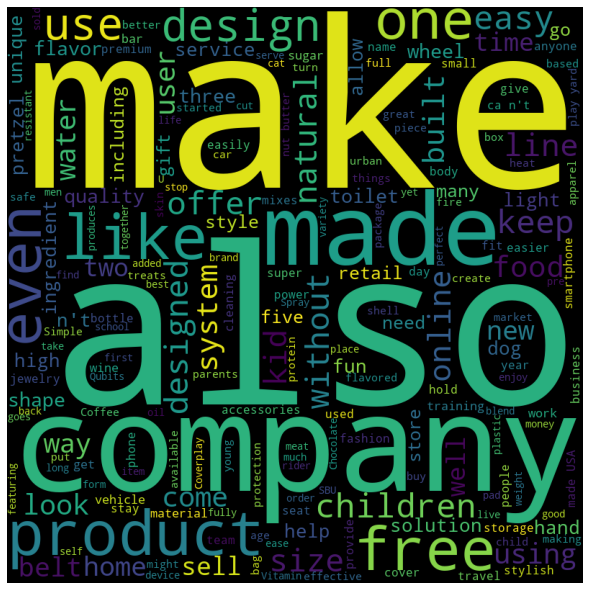

In [233]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_true)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [234]:
#word cloud false [Did not secure a deal]

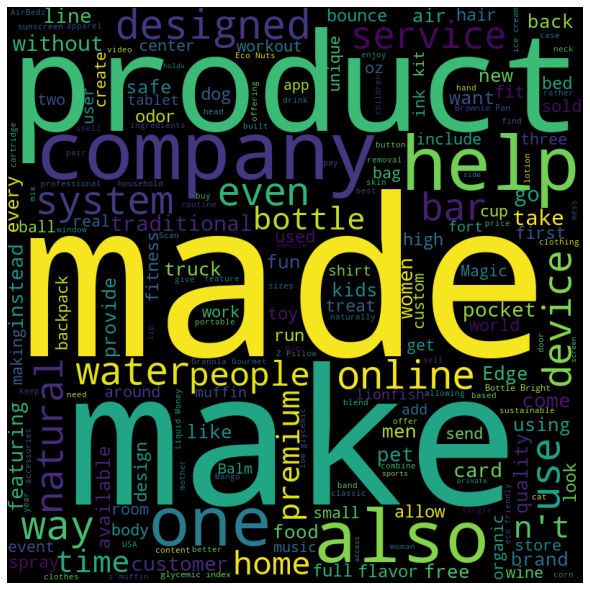

In [235]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(comment_words_false)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [236]:
#Q4: Refer to both the word clouds. What do you infer?

The 'secured a deal' wordcloud contains words such as 'one', 'design' , 'free' ,'children' ,'offer', 'easy' ,'online','use' .These indicate that Deals aimed towards catering to the children, which provided offers or a free sample/product, was easy to use, had a good design and was unique in its creativity are more likely to secure a deal.

The 'Did not secure a deal' wordcloud contains words such as 'one', 'designed' , 'help' ,'device' ,'bottle', 'premium' ,'use' .These indicate that Deals with a mediocre design, less suited to solve/help a problem, products involving water bottles, having a higher and premium price tag and less usability are less likely to secure a deal.

It is also observed that words such as 'one', 'designed' ,'system' and 'use' have a higher weight in both these wordclouds.This indicates that either these were not the defining factors to whether a deal is made or not or might have been used in a different context in the description in each scenario.

Q5.Looking at the word clouds, is it true that the entrepreneurs who introduced devices are less likely to secure a deal based on your analysis?

The word 'device' is not easily found in the 'secured a deal' wordcloud while it is easily spotted in tne 'not secured a deal' wordcloud. This indicates that the word 'device' occured frequently when a deal was rejected hence implying the statement given in the question is true.

SyntaxError: invalid syntax (<ipython-input-236-20905b52ccb4>, line 3)